## **PRÁCTICA INTEGRADORA: VISUALIZACIÓN EN PYTHON**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

**1. Cargar este archivo en Python. Realizar estadísticas descriptivas básicas**

In [2]:
df = pd.read_csv("../files/HRDataset_v14.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


**2. Realizar un histograma con los salarios. Qué rango(s) de salarios son los más populares?**

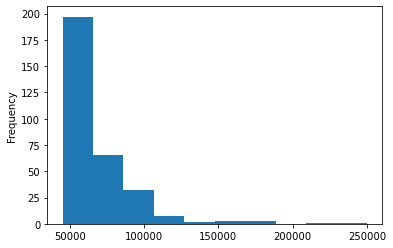

In [4]:
df.Salary.plot(kind='hist');

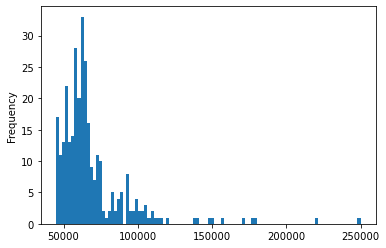

In [5]:
df.Salary.plot(kind='hist', bins=100);

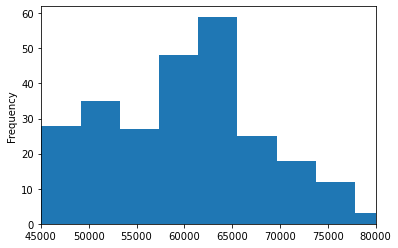

In [6]:
df.Salary.plot(kind='hist', bins=50, xlim=(45000,80000));

El rango de salario más popular va desde 60 a 65 mil.

**3. Realizar un gráfico de violín con los salarios, discriminados por género.**

In [7]:
import seaborn as sns
sns.__version__

'0.11.2'

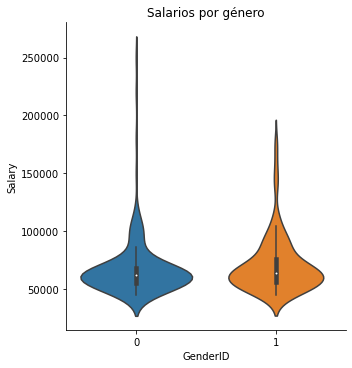

In [8]:
ax = sns.catplot(data=df, kind='violin', x='GenderID', y='Salary', split=True)
ax.set(title='Salarios por género')

**4. Graficar la serie de tiempo correspondiente a la fecha de contratación (DateofHire)**

In [9]:
df['DateofHire']

0       7/5/2011
1      3/30/2015
2       7/5/2011
3       1/7/2008
4      7/11/2011
         ...    
306     7/7/2014
307     9/2/2008
308    4/10/2010
309    3/30/2015
310    9/29/2014
Name: DateofHire, Length: 311, dtype: object

In [10]:
df['DateofHire'] = pd.DatetimeIndex(df['DateofHire']).year

In [11]:
empleados_por_año = df.groupby(["DateofHire"]).count()

In [12]:
empleados_por_año = empleados_por_año["EmpID"]

In [13]:
empleados_por_año

DateofHire
2006     1
2007     2
2008     3
2009     7
2010     9
2011    83
2012    45
2013    44
2014    60
2015    36
2016    14
2017     6
2018     1
Name: EmpID, dtype: int64

<AxesSubplot:xlabel='DateofHire'>

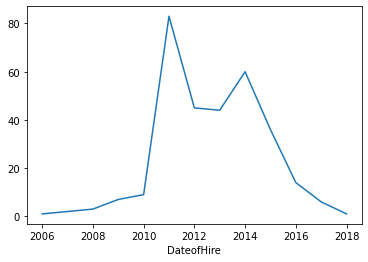

In [14]:
empleados_por_año.plot()